In [1]:
import tensorflow as tf
import yaml
from pathlib import Path
from vanilla_gan import GAN
from data_gen import generate_sin_data, generate_mnist_data, generate_mnist_data_dcgan
from utils import display_images

config = yaml.load(Path("config.yaml").read_text(), Loader=yaml.SafeLoader)

In [2]:
train_dataset = generate_mnist_data_dcgan(config)

Epoch nr: 0
Step 0: Discriminator loss = 1.4023939371109009, Generator loss: 0.6851934194564819
Step 100: Discriminator loss = 1.065992832183838, Generator loss: 0.6520114541053772
Step 200: Discriminator loss = 1.2857754230499268, Generator loss: 0.6394706964492798


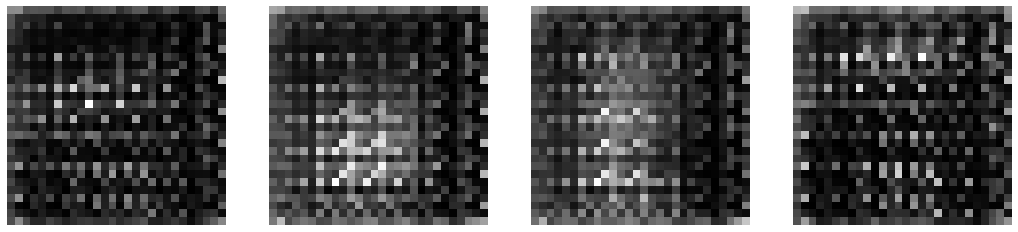

Epoch nr: 1
Step 0: Discriminator loss = 0.9887380003929138, Generator loss: 0.9512011408805847
Step 100: Discriminator loss = 1.6575855016708374, Generator loss: 0.693584680557251
Step 200: Discriminator loss = 1.474851369857788, Generator loss: 0.7259788513183594


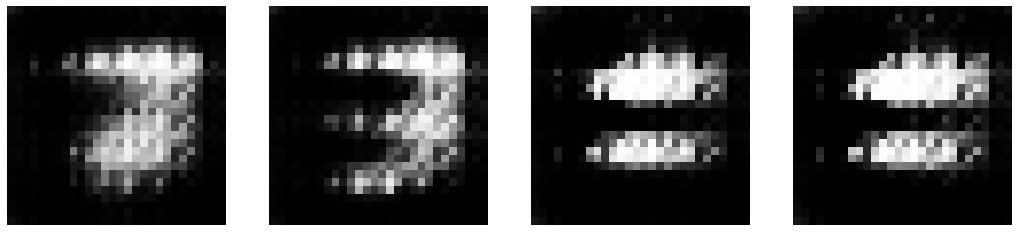

Epoch nr: 2
Step 0: Discriminator loss = 1.3253086805343628, Generator loss: 0.7221359014511108
Step 100: Discriminator loss = 1.1520816087722778, Generator loss: 0.8767765760421753
Step 200: Discriminator loss = 1.5311918258666992, Generator loss: 0.6957928538322449


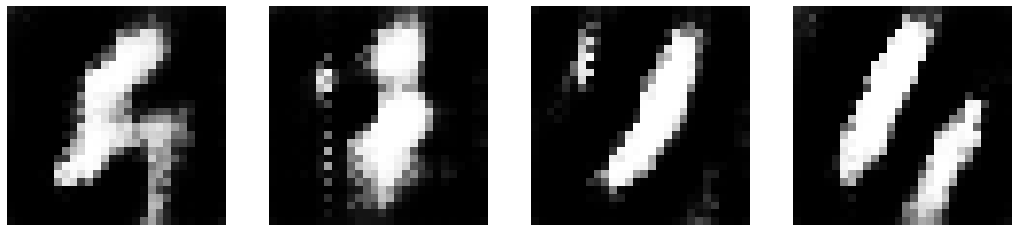

Epoch nr: 3
Step 0: Discriminator loss = 0.9692241549491882, Generator loss: 1.1103699207305908
Step 100: Discriminator loss = 1.157921314239502, Generator loss: 0.9077434539794922
Step 200: Discriminator loss = 1.4877935647964478, Generator loss: 0.6734856367111206


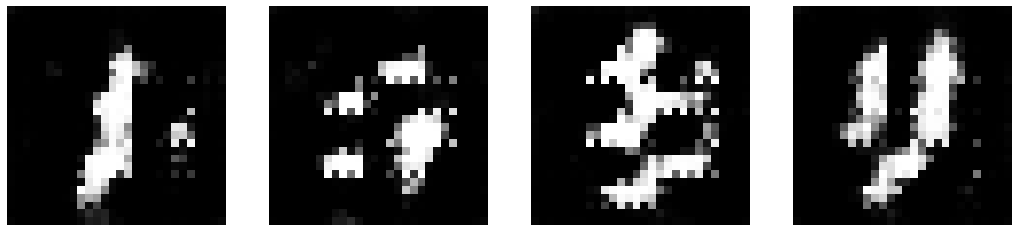

Epoch nr: 4
Step 0: Discriminator loss = 1.0459078550338745, Generator loss: 1.1071949005126953
Step 100: Discriminator loss = 1.2891581058502197, Generator loss: 0.816831648349762
Step 200: Discriminator loss = 1.3468804359436035, Generator loss: 0.8832334280014038


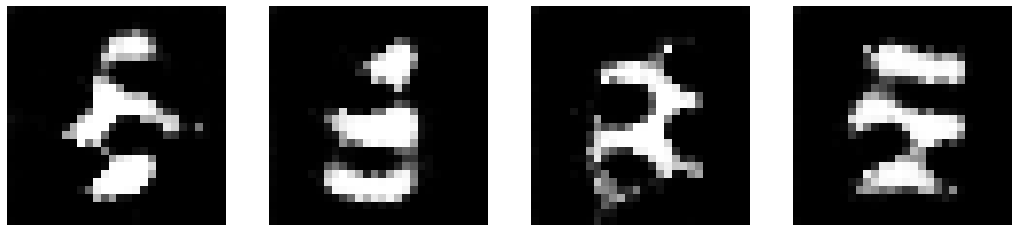

Epoch nr: 5
Step 0: Discriminator loss = 1.3535974025726318, Generator loss: 0.7191996574401855
Step 100: Discriminator loss = 1.1127101182937622, Generator loss: 1.0432252883911133
Step 200: Discriminator loss = 1.19041109085083, Generator loss: 0.9324749708175659


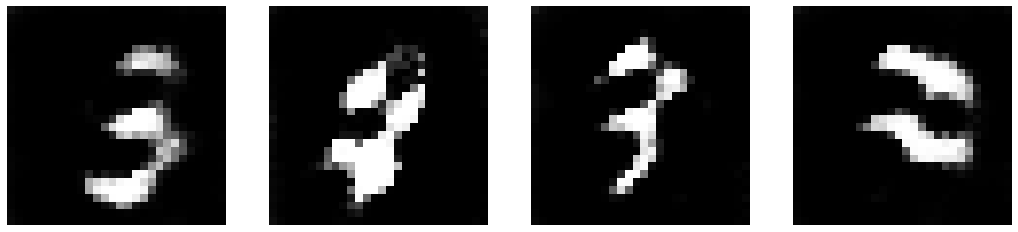

Epoch nr: 6
Step 0: Discriminator loss = 1.3531826734542847, Generator loss: 0.8698935508728027
Step 100: Discriminator loss = 1.2087314128875732, Generator loss: 0.8350895643234253
Step 200: Discriminator loss = 1.5774093866348267, Generator loss: 0.6857181787490845


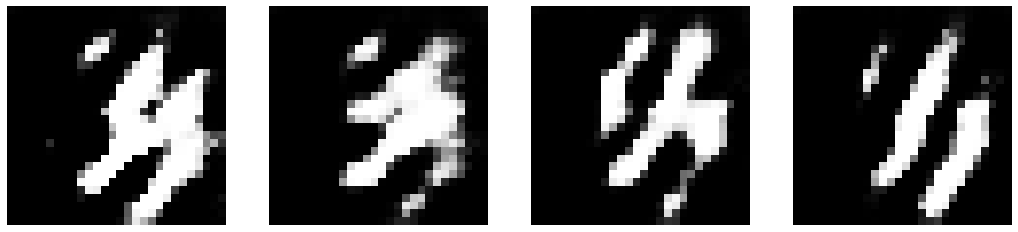

Epoch nr: 7
Step 0: Discriminator loss = 1.132954716682434, Generator loss: 0.8720196485519409
Step 100: Discriminator loss = 1.33521568775177, Generator loss: 0.8531376123428345
Step 200: Discriminator loss = 0.7832562923431396, Generator loss: 1.3098483085632324


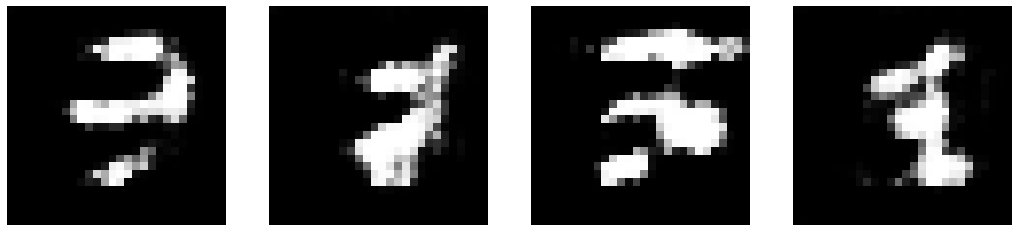

Epoch nr: 8
Step 0: Discriminator loss = 1.6228855848312378, Generator loss: 0.7816336154937744
Step 100: Discriminator loss = 1.1305409669876099, Generator loss: 1.2132939100265503
Step 200: Discriminator loss = 1.1566725969314575, Generator loss: 1.0160077810287476


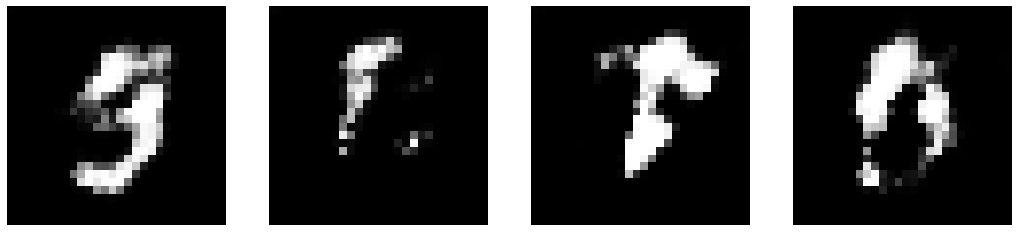

Epoch nr: 9
Step 0: Discriminator loss = 1.2345337867736816, Generator loss: 0.9307047724723816
Step 100: Discriminator loss = 1.179004430770874, Generator loss: 0.8571370840072632
Step 200: Discriminator loss = 1.2385811805725098, Generator loss: 0.8657823801040649


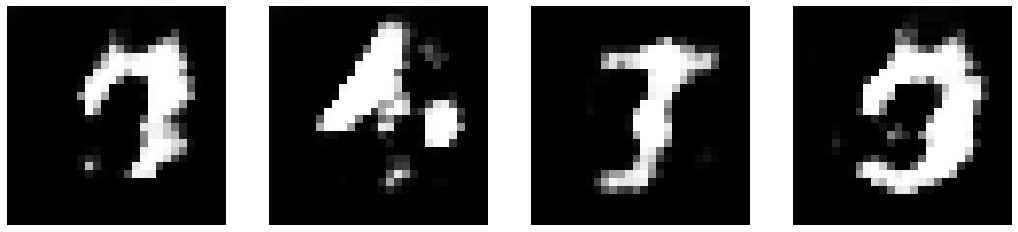

Epoch nr: 10
Step 0: Discriminator loss = 1.1097931861877441, Generator loss: 0.9673981070518494
Step 100: Discriminator loss = 1.1467864513397217, Generator loss: 1.0400996208190918
Step 200: Discriminator loss = 0.9514942169189453, Generator loss: 1.121150016784668


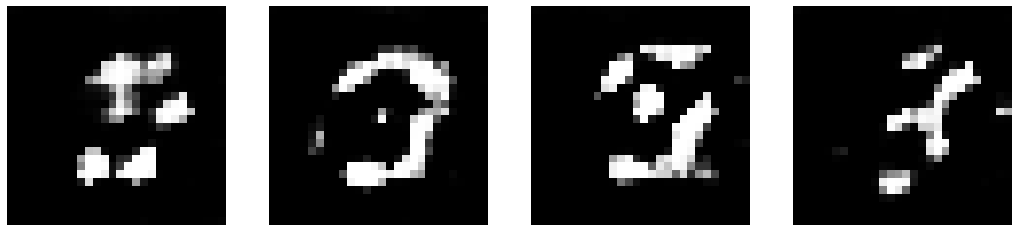

Epoch nr: 11
Step 0: Discriminator loss = 1.3782200813293457, Generator loss: 0.9850304126739502
Step 100: Discriminator loss = 1.2787384986877441, Generator loss: 0.9692713022232056
Step 200: Discriminator loss = 1.2206213474273682, Generator loss: 0.9226358532905579


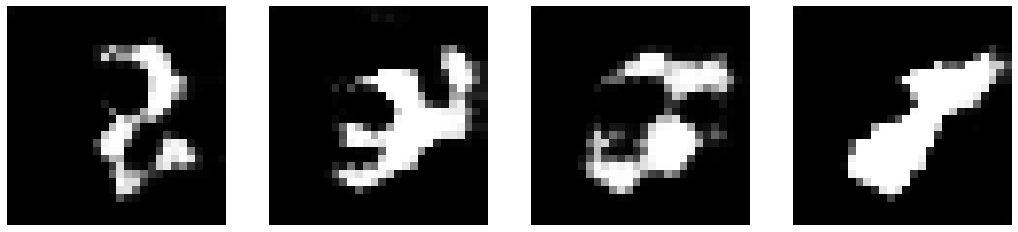

Epoch nr: 12
Step 0: Discriminator loss = 1.1027030944824219, Generator loss: 1.0865745544433594
Step 100: Discriminator loss = 1.0878247022628784, Generator loss: 1.0508906841278076
Step 200: Discriminator loss = 0.9221007823944092, Generator loss: 1.2574248313903809


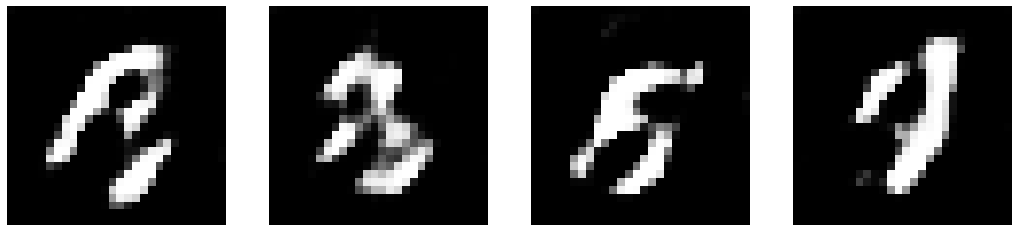

Epoch nr: 13
Step 0: Discriminator loss = 1.0735771656036377, Generator loss: 1.0938949584960938
Step 100: Discriminator loss = 0.9740420579910278, Generator loss: 1.1420469284057617
Step 200: Discriminator loss = 0.9237907528877258, Generator loss: 1.2672502994537354


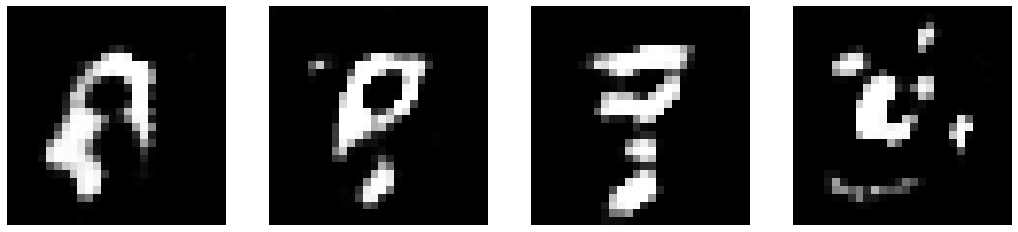

Epoch nr: 14
Step 0: Discriminator loss = 1.2450759410858154, Generator loss: 1.0838396549224854
Step 100: Discriminator loss = 1.2619653940200806, Generator loss: 0.9446330070495605
Step 200: Discriminator loss = 0.9815772771835327, Generator loss: 1.138099193572998


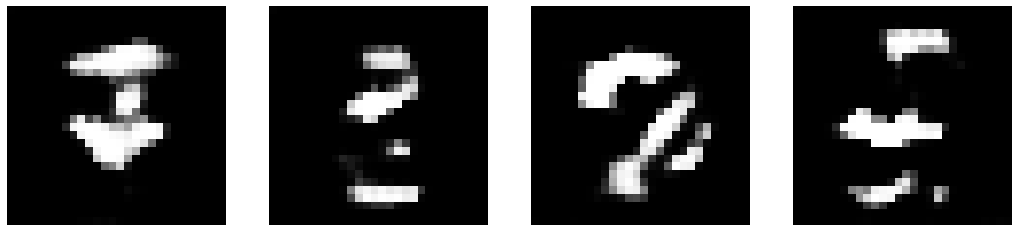

Epoch nr: 15
Step 0: Discriminator loss = 1.0878874063491821, Generator loss: 1.0241811275482178
Step 100: Discriminator loss = 0.9504832029342651, Generator loss: 1.2968015670776367
Step 200: Discriminator loss = 0.9752240180969238, Generator loss: 1.3399842977523804


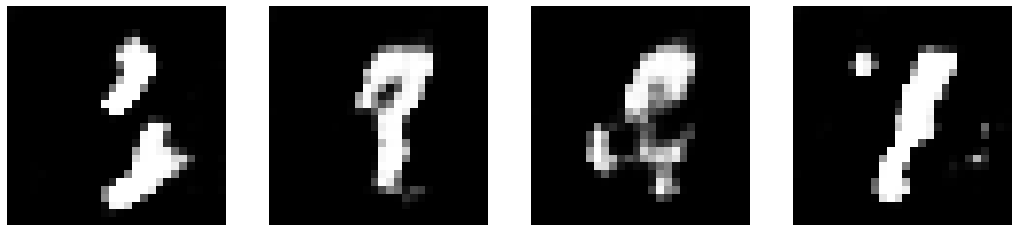

Epoch nr: 16
Step 0: Discriminator loss = 0.8621048927307129, Generator loss: 1.3791255950927734
Step 100: Discriminator loss = 1.2527662515640259, Generator loss: 1.0436713695526123
Step 200: Discriminator loss = 1.2857904434204102, Generator loss: 1.055559754371643


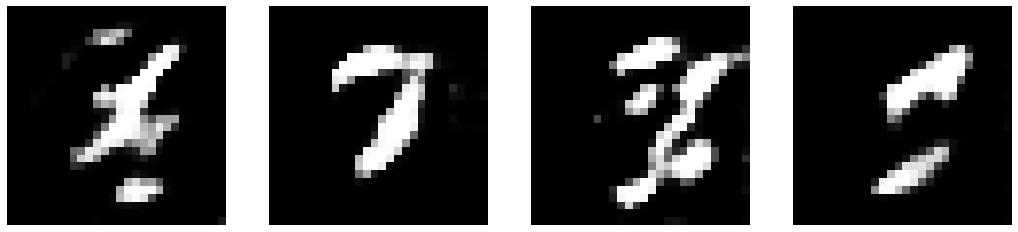

Epoch nr: 17
Step 0: Discriminator loss = 1.2555021047592163, Generator loss: 1.194963812828064
Step 100: Discriminator loss = 0.8734619617462158, Generator loss: 1.2588975429534912
Step 200: Discriminator loss = 0.9029707312583923, Generator loss: 1.2539002895355225


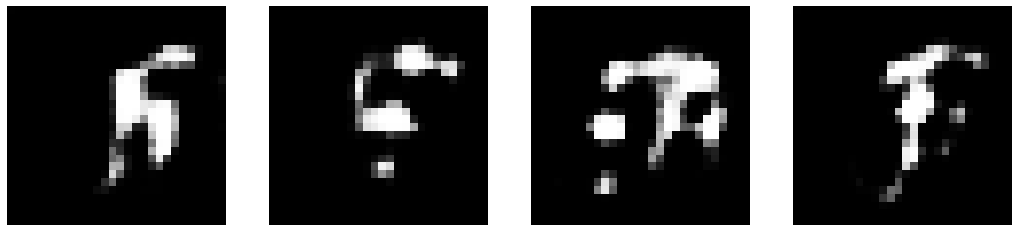

Epoch nr: 18
Step 0: Discriminator loss = 1.145858883857727, Generator loss: 1.1298803091049194
Step 100: Discriminator loss = 1.234339714050293, Generator loss: 1.0398857593536377
Step 200: Discriminator loss = 0.8230632543563843, Generator loss: 1.4649147987365723


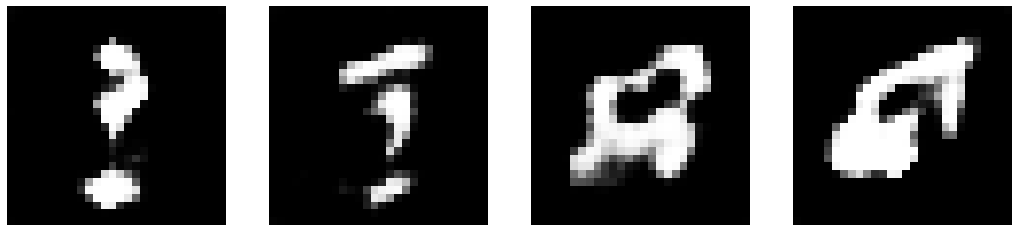

Epoch nr: 19
Step 0: Discriminator loss = 1.2424750328063965, Generator loss: 1.0285487174987793
Step 100: Discriminator loss = 0.9892299771308899, Generator loss: 1.232582926750183
Step 200: Discriminator loss = 1.222406029701233, Generator loss: 1.198154330253601


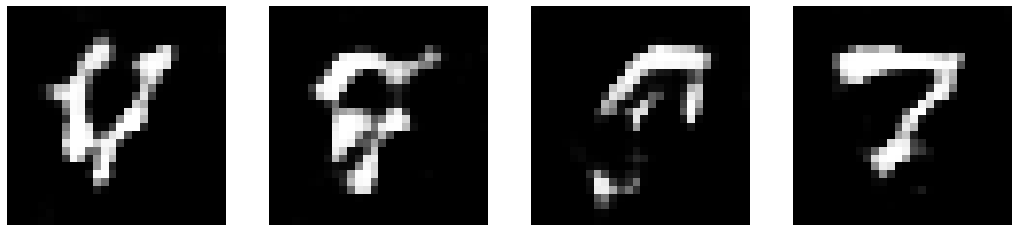

In [3]:
model = GAN(config)

EPOCHS = 20
batch_size = config["vanilla-gan"]["batch_size"]

for epoch in range(EPOCHS):
    print(f"Epoch nr: {epoch}")
    for step, train_batch in enumerate(train_dataset):
        discriminator_loss, generator_loss = model(train_batch)

        if step % 100 == 0:
            print(f"Step {step}: Discriminator loss = {discriminator_loss}, Generator loss: {generator_loss}")

    generated_samples = model.generate_sample()
    display_images(generated_samples)